In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [29]:
#pandas settings
settings= {'display.max_rows': 50,
           'display.max_columns': 200,
           'display.width': 1000}

for k, v in settings.items():
    pd.set_option(k,v)
    
#matplotlib settings
plt.style.use('ggplot')


In [3]:
#Load raw data to pandas
path= "../../Data/Raw_Data/"

raw_energy= pd.read_csv(path + "energy_dataset.csv")
raw_weather= pd.read_csv(path + "weather_features.csv")

In [4]:
#preview energy data
print("Energy shape: ", raw_energy.shape)
raw_energy.head()

Energy shape:  (35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,863.0,1051.0,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,920.0,1009.0,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,1164.0,973.0,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,1503.0,949.0,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,1826.0,953.0,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [5]:
#preview weather data
print("Weather shape: ", raw_weather.shape)
raw_weather.head()

Weather shape:  (178396, 17)


,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


Data Cleaning

In [6]:
#Import modules
path= "../../"
os.chdir(path)

In [7]:
from src.DataCleaning import clean_columns, set_time_index, kelvin_to_fahrenheit

#Clean raw_energy
clean_energy= set_time_index(clean_columns(raw_energy, cols= None), time_column= "time")

#Clean raw_weather
clean_weather= set_time_index(clean_columns(raw_weather, cols= None), time_column= "dt_iso")

weather_cols= ["temp", "temp_min", "temp_max"]
clean_weather= kelvin_to_fahrenheit(clean_weather, weather_cols)

In [8]:
#Sanity checks
print("Old energy: %s  New energy: %s" % (raw_energy.shape, clean_energy.shape))
print("Old weather: %s  New weather: %s" % (raw_weather.shape, clean_weather.shape))

Old energy: (35064, 29)  New energy: (35064, 20)
Old weather: (178396, 17)  New weather: (178396, 16)


Stats about energy data

In [9]:
#descriptive stats
clean_energy.describe().T

,count,mean,std,min,25%,50%,75%,max
generation biomass,35045.0,383.513540,85.353943,0.00,333.0000,367.00,433.00,592.00
generation fossil brown coal/lignite,35046.0,448.059208,354.568590,0.00,0.0000,509.00,757.00,999.00
generation fossil gas,35046.0,5622.737488,2201.830478,0.00,4126.0000,4969.00,6429.00,20034.00
generation fossil hard coal,35046.0,4256.065742,1961.601013,0.00,2527.0000,4474.00,5838.75,8359.00
generation fossil oil,35045.0,298.319789,52.520673,0.00,263.0000,300.00,330.00,449.00
generation hydro pumped storage consumption,35045.0,475.577343,792.406614,0.00,0.0000,68.00,616.00,4523.00
generation hydro run-of-river and poundage,35045.0,972.116108,400.777536,0.00,637.0000,906.00,1250.00,2000.00
generation hydro water reservoir,35046.0,2605.114735,1835.199745,0.00,1077.2500,2164.00,3757.00,9728.00
generation nuclear,35047.0,6263.907039,839.667958,0.00,5760.0000,6566.00,7025.00,7117.00
generation other,35046.0,60.228585,20.238381,0.00,53.0000,57.00,80.00,106.00


In [33]:
#missing data
print("Missing data:")
clean_energy.isna().sum()

Missing data:


generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
forecast solar day ahead                        0
forecast wind onshore day ahead                 0
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0


Stats about energy data

**Stats about Weather data**

In [11]:
#descriptive stats
clean_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,178396.0,61.913489,14.447159,12.632,51.206000,61.07,71.870000,108.680
temp_min,178396.0,59.594795,14.319884,12.632,49.070483,59.27,69.314225,107.870
temp_max,178396.0,64.564280,15.502417,12.632,52.970000,62.87,75.470000,118.670
pressure,178396.0,1069.260740,5969.631893,0.000,1013.000000,1018.00,1022.000000,1008371.000
humidity,178396.0,68.423457,21.902888,0.000,53.000000,72.00,87.000000,100.000
wind_speed,178396.0,2.470560,2.095910,0.000,1.000000,2.00,4.000000,133.000
wind_deg,178396.0,166.591190,116.611927,0.000,55.000000,177.00,270.000000,360.000
rain_1h,178396.0,0.075492,0.398847,0.000,0.000000,0.00,0.000000,12.000
rain_3h,178396.0,0.000380,0.007288,0.000,0.000000,0.00,0.000000,2.315
snow_3h,178396.0,0.004763,0.222604,0.000,0.000000,0.00,0.000000,21.500


In [12]:
clean_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2015-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  int64  
 5   humidity             178396 non-null  int64  
 6   wind_speed           178396 non-null  int64  
 7   wind_deg             178396 non-null  int64  
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  int64  
 12  weather_id           178396 non-null  int64  
 13  weather_main         178396 non-null  object 
 14  weather_description  178396 non-nu

EDA Weather Data

In [13]:
clean_weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
dt_iso,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,Valencia,27.4550,27.4550,27.4550,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 01:00:00,Valencia,27.4550,27.4550,27.4550,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 02:00:00,Valencia,26.0348,26.0348,26.0348,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 03:00:00,Valencia,26.0348,26.0348,26.0348,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2015-01-01 04:00:00,Valencia,26.0348,26.0348,26.0348,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [15]:
clean_weather.city_name.unique()

array(['Valencia', 'Madrid', 'Bilbao', ' Barcelona', 'Seville'],
      dtype=object)

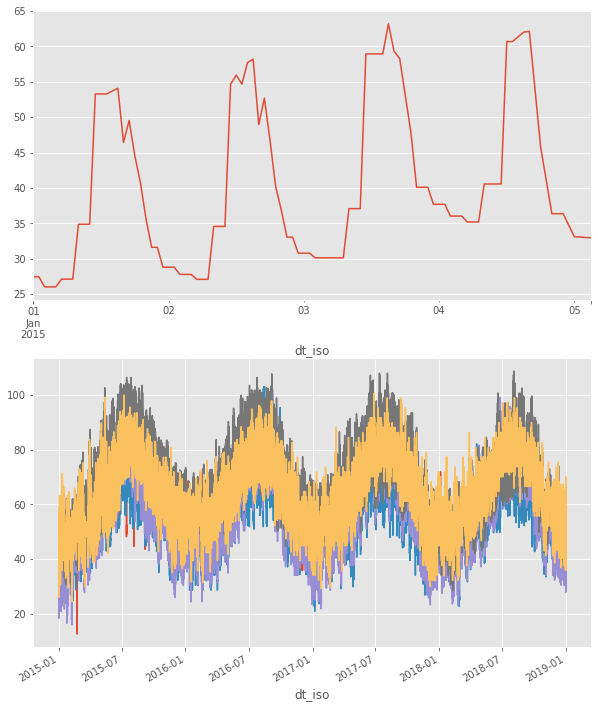

In [30]:
f, ax= plt.subplots(2, 1, figsize= (10, 13))

clean_weather[:100].groupby(["city_name"]).temp.plot(ax=ax[0])
clean_weather.groupby(["city_name"]).temp.plot(ax=ax[1]);

Feature engineering ideas
- flags for season